In [14]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [15]:
import os
os.listdir('data/dogscats')

['test', 'sample', 'valid', 'models', 'train', 'tmp', 'test1']

In [16]:
PATH = 'data/dogscats'
size = 299
arch = resnet34
bs=64

In [17]:
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom = 1.1)
data = ImageClassifierData.from_paths(PATH, bs, tfms=tfms, num_workers = 4, test_name='test1')
model = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

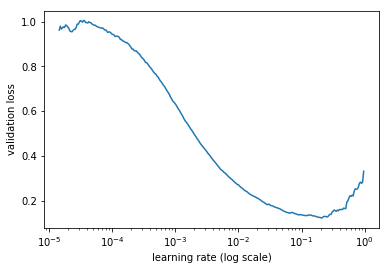

In [18]:
model.lr_find()
model.sched.plot()

In [19]:
lr = 1e-2
model.fit(lr, 2, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.062221   0.027987   0.9895    
    1      0.048119   0.026094   0.989                        


[array([0.02609]), 0.989]

In [20]:
model.precompute = False

In [21]:
model.unfreeze()
lr = [1e-4, 1e-3, 1e-2]
model.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.048272   0.020628   0.9925    
    1      0.04083    0.019128   0.992                        
    2      0.033045   0.017992   0.993                        


[array([0.01799]), 0.993]

In [22]:
model.save('224_all')

In [23]:
model.precompute = False
model.load('224_all')

In [24]:
log_preds,y = model.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.995

# Confusion Matrix

In [70]:
log_preds,y = model.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.4988

In [71]:
predictions = np.argmax(probs, axis=1)

In [101]:
submission = pd.DataFrame({'id':os.listdir(f'{PATH}/test1'), 'label':probs})
submission['id'] = submission['id'].map(lambda x: x.split('.')[0])
submission['id'] = submission['id'].astype(int)
submission = submission.sort_values('id')
submission.to_csv(f'{PATH}/output.csv', index=False)

[[6235 6265]
 [   0    0]]


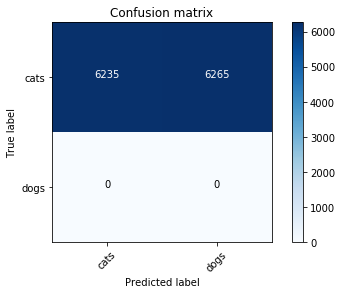

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predictions)
plot_confusion_matrix(cm, data.classes)

In [45]:
submit_df = pd.DataFrame(predictions)

In [50]:
?np.mean

In [64]:
(np.exp(log_preds))

array([[[0.00108, 0.99892],
        [0.99986, 0.00014],
        [0.01096, 0.98904],
        ...,
        [0.0002 , 0.9998 ],
        [1.     , 0.     ],
        [1.     , 0.     ]],

       [[0.00093, 0.99907],
        [0.9998 , 0.0002 ],
        [0.02208, 0.97792],
        ...,
        [0.00003, 0.99997],
        [1.     , 0.     ],
        [1.     , 0.     ]],

       [[0.00049, 0.99951],
        [1.     , 0.     ],
        [0.00448, 0.99552],
        ...,
        [0.00019, 0.99981],
        [1.     , 0.     ],
        [1.     , 0.     ]],

       [[0.00136, 0.99864],
        [0.99986, 0.00014],
        [0.00354, 0.99646],
        ...,
        [0.00037, 0.99963],
        [1.     , 0.     ],
        [1.     , 0.     ]],

       [[0.00024, 0.99976],
        [0.99966, 0.00034],
        [0.0156 , 0.9844 ],
        ...,
        [0.00023, 0.99977],
        [1.     , 0.     ],
        [1.     , 0.     ]]], dtype=float32)

In [30]:
# predictions = np.argmax(probs, axis=1)
# submit_df = pd.DataFrame(np.exp(predictions))
# submit_df.info()

In [31]:
# submit_df.columns = data.classes
# submit_df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
# ds.head()

In [32]:
# SUBMIT_PATH = f'{PATH}/submit/'
# os.makedirs(SUBMIT_PATH, exist_ok=True)
# ds.to_csv(f'{SUBMIT_PATH}subm.gz', compression='gzip', index=False)
# FileLink(f'{SUBMIT_PATH}subm.gz')

## Submission

In [33]:
temp = model.predict(is_test=True)
# pred_test = np.argmax(temp, axis=1)
# probs = np.exp(temp[:,1])

In [34]:
# submit_df.columns = data.classes
# submit_df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
# ds.head()

In [35]:
# SUBMIT_PATH = f'{PATH}/submit/'
# os.makedirs(SUBMIT_PATH, exist_ok=True)
# ds.to_csv(f'{SUBMIT_PATH}subm.gz', compression='gzip', index=False)
# FileLink(f'{SUBMIT_PATH}subm.gz')

In [36]:
# os.makedirs(f'{PATH}/test', exist_ok=True)
# submission = pd.DataFrame({'id':os.listdir(f'{PATH}/test'), 'label':probs})
# submission['id'] = submission['id'].map(lambda x: x.split('.')[0])
# submission['id'] = submission['id'].astype(int)
# submission = submission.sort_values('id')
# submission.to_csv('../output.csv', index=False)